#### About Dataset:
The Tennis dataset is a classic example used in the context of decision tree algorithms and is often employed to illustrate their functionality in both educational and practical settings. It represents a simplified scenario where a tennis coach needs to decide whether to play tennis on a given day based on weather conditions.

The dataset typically consists of a small number of instances, each representing a day, and includes attributes such as outlook (e.g., sunny, overcast, rainy), temperature (e.g., hot, mild, cool), humidity (e.g., high, normal), and windy (e.g., true, false). The target variable is whether or not the tennis match was played on that day (e.g., yes, no).

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("tennis.csv")
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


### C4.5
C4.5 is an extension of ID3 that addresses some of its limitations. Instead of information gain, C4.5 uses gain ratio as the splitting criterion, which normalizes the information gain by the intrinsic value of the feature.

Gain Ratio is a criterion used in decision tree algorithms, particularly in the C4.5 algorithm, to select the best feature for splitting a dataset. While Information Gain (used in ID3) tends to favor attributes with a large number of distinct values, Gain Ratio penalizes such features, thus overcoming the bias towards attributes with many categories.

In [2]:
# Function to calculate entropy
def entropy(data):
    classes = data.unique()
    entropy = 0
    total = len(data)
    for cls in classes:
        p_cls = len(data[data == cls]) / total
        entropy -= p_cls * np.log2(p_cls) if p_cls != 0 else 0
    return entropy

# Function to calculate split information
def split_information(data):
    total = len(data)
    split_info = 0
    for cls in data.unique():
        p_cls = len(data[data == cls]) / total
        split_info -= p_cls * np.log2(p_cls) if p_cls != 0 else 0
    return split_info

# Function to calculate gain ratio
def gain_ratio(data, feature):
    total_entropy = entropy(data['play'])
    feature_values = data[feature].unique()
    split_info = split_information(data[feature])
    information_gain = 0
    print(f"\n{feature} subset")
    for value in feature_values:
        subset = data[data[feature] == value]
        print("\n", subset)
        information_gain += len(subset) / len(data) * entropy(subset['play'])
    gain = total_entropy - information_gain
    gain_ratio = gain / split_info if split_info != 0 else 0
    return gain_ratio

#### Entropy:
entropy(data): This function calculates the entropy of a dataset. Entropy is a measure of uncertainty or disorder in a set of data. It calculates the entropy for the target variable 'play' in this case.
#### Split Information:
split_information(data): This function calculates the split information of a dataset. Split information measures the evenness of the distribution of classes in a dataset. It calculates the split information based on the frequency of each class in the dataset.
#### Gain Ratio:
gain_ratio(data, feature): This function calculates the gain ratio of a dataset with respect to a particular feature. Gain ratio is a measure of the effectiveness of a feature in splitting the data. It combines information gain with split information to account for the intrinsic information of the feature. This function calculates the gain ratio for the specified feature by considering the total entropy, split information, and information gain of subsets formed by splitting the data based on unique values of the feature.

In [3]:
# Calculate gain ratio for each feature
gain_ratios = {}
for column in df.columns[:-1]:  # Exclude the target column
    gain_ratios[column] = gain_ratio(df, column)

print("Gain ratio for each feature:")
print(gain_ratios)

# Choose the feature with the highest gain ratio
best_feature = max(gain_ratios, key=gain_ratios.get)
print("\nBest feature to split the dataset:", best_feature)


outlook subset

    outlook  temp humidity  windy play
0    sunny   hot     high  False   no
1    sunny   hot     high   True   no
7    sunny  mild     high  False   no
8    sunny  cool   normal  False  yes
10   sunny  mild   normal   True  yes

      outlook  temp humidity  windy play
2   overcast   hot     high  False  yes
6   overcast  cool   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes

    outlook  temp humidity  windy play
3    rainy  mild     high  False  yes
4    rainy  cool   normal  False  yes
5    rainy  cool   normal   True   no
9    rainy  mild   normal  False  yes
13   rainy  mild     high   True   no

temp subset

      outlook temp humidity  windy play
0      sunny  hot     high  False   no
1      sunny  hot     high   True   no
2   overcast  hot     high  False  yes
12  overcast  hot   normal  False  yes

      outlook  temp humidity  windy play
3      rainy  mild     high  False  yes
7      sunny  mild     high  F

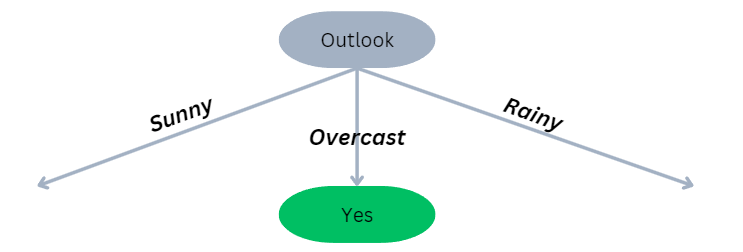

In [4]:
def subset_col(data, feature):
    values = data[feature].unique()
    total = len(data)
    subsets = {}
    for value in values:
        s = data[data[feature] == value]
        subsets[value] = s
    return subsets

The function subset_col(data, feature) is designed to create subsets of a dataset based on unique values of a specified feature. Here's a breakdown of what each part does:

data: This parameter represents the dataset on which you want to operate.

feature: This parameter specifies the column (feature) in the dataset based on which you want to create subsets.

In [5]:
outlook = subset_col(df, "outlook")

The Gain Ratio analysis identifies "Outlook" as the root node of the decision tree due to its highest Gain Ratio among all features. This indicates that "Outlook" provides the most significant information gain for classifying the dataset.

In [6]:
# Calculate gain ratio for each feature
gain_ratios = {}
for column in outlook['sunny'].columns[1:-1]:  # Exclude the target column
    gain_ratios[column] = gain_ratio(outlook['sunny'], column)

print("Gain ratio for each feature:")
print(gain_ratios)

# Choose the feature with the highest gain ratio
best_feature = max(gain_ratios, key=gain_ratios.get)
print("\nBest feature to split the dataset:", best_feature)


temp subset

   outlook temp humidity  windy play
0   sunny  hot     high  False   no
1   sunny  hot     high   True   no

    outlook  temp humidity  windy play
7    sunny  mild     high  False   no
10   sunny  mild   normal   True  yes

   outlook  temp humidity  windy play
8   sunny  cool   normal  False  yes

humidity subset

   outlook  temp humidity  windy play
0   sunny   hot     high  False   no
1   sunny   hot     high   True   no
7   sunny  mild     high  False   no

    outlook  temp humidity  windy play
8    sunny  cool   normal  False  yes
10   sunny  mild   normal   True  yes

windy subset

   outlook  temp humidity  windy play
0   sunny   hot     high  False   no
7   sunny  mild     high  False   no
8   sunny  cool   normal  False  yes

    outlook  temp humidity  windy play
1    sunny   hot     high   True   no
10   sunny  mild   normal   True  yes
Gain ratio for each feature:
{'temp': 0.37514952012034747, 'humidity': 1.0, 'windy': 0.020570659450692974}

Best feature t

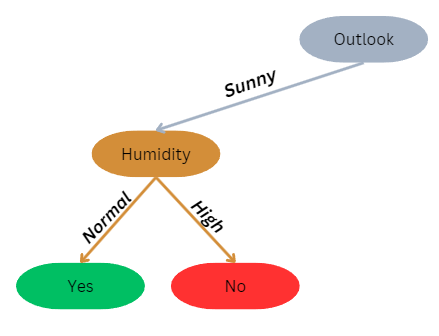

From the "Sunny" characteristic of the "Outlook" feature, the next split occurs at the "Humidity" feature. This decision is based on the feature's high Gain Ratio, further refining the classification process.

The Humidity split reaches its final decision, indicating that no further splitting is performed.

In [7]:
# Calculate gain ratio for each feature
gain_ratios = {}
for column in outlook['rainy'].columns[1:-1]:  # Exclude the target column
    gain_ratios[column] = gain_ratio(outlook['rainy'], column)

print("Gain ratio for each feature:")
print(gain_ratios)

# Choose the feature with the highest gain ratio
best_feature = max(gain_ratios, key=gain_ratios.get)
print("\nBest feature to split the dataset:", best_feature)


temp subset

    outlook  temp humidity  windy play
3    rainy  mild     high  False  yes
9    rainy  mild   normal  False  yes
13   rainy  mild     high   True   no

   outlook  temp humidity  windy play
4   rainy  cool   normal  False  yes
5   rainy  cool   normal   True   no

humidity subset

    outlook  temp humidity  windy play
3    rainy  mild     high  False  yes
13   rainy  mild     high   True   no

   outlook  temp humidity  windy play
4   rainy  cool   normal  False  yes
5   rainy  cool   normal   True   no
9   rainy  mild   normal  False  yes

windy subset

   outlook  temp humidity  windy play
3   rainy  mild     high  False  yes
4   rainy  cool   normal  False  yes
9   rainy  mild   normal  False  yes

    outlook  temp humidity  windy play
5    rainy  cool   normal   True   no
13   rainy  mild     high   True   no
Gain ratio for each feature:
{'temp': 0.020570659450692974, 'humidity': 0.020570659450692974, 'windy': 1.0}

Best feature to split the dataset: windy


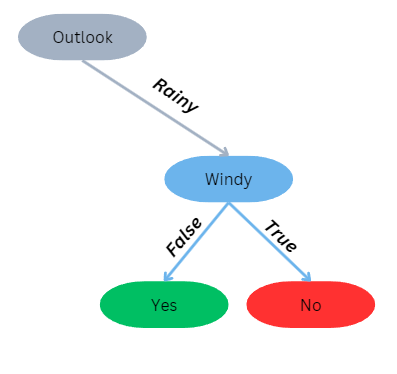

Similarly, for instances characterized by a "Rainy" outlook, the subsequent split occurs at the "Windy" feature.

No further splits can be made as tree reached final  decisions in every branch("Yes"/"No").

In [8]:
humidity = subset_col(outlook['sunny'], "humidity")
humidity['high']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [9]:
humidity['normal']

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [10]:
windy = subset_col(outlook['rainy'], "windy")
windy[True]

,outlook,temp,humidity,windy,play
5,rainy,cool,normal,True,no
13,rainy,mild,high,True,no


In [11]:
windy[False]

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [12]:
df[df['outlook'] == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


#### Final Decision Tree:

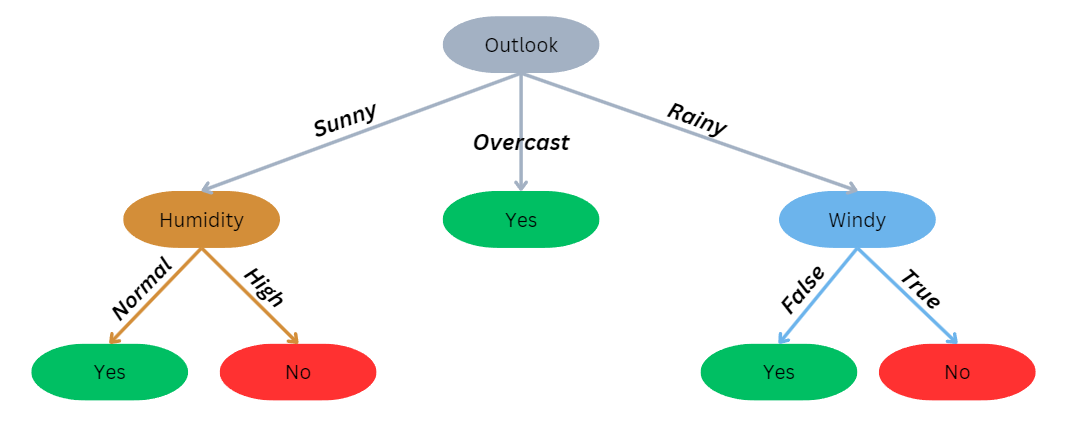